# __Longitudinal Inference of Hippocampal Volume and Morphometric Hippocampal-Cortical Connectivity__
### Totzek, J. F., Chakravarty, M. M., Joober, R., Malla, A., Shah, J., Young, A. L., Lepage, M. & Lavigne, K. M. (_in preparation_)

This notebook describes the processing steps that were performed for the z-score Subtype and Stage Inference (z-score SuStaIn, [Young et al. (2018)](https://doi.org/10.1038/s41467-018-05892-0
)) analysis of the article "Longitudinal Inference of Hippocampal Volume and Morphometric Hippocampal-Cortical Connectivity" (Totzek et al., in preparation). Analyses were performed by the means of pySuStaIn [Aksman et al. (2021)](https://doi.org/10.1016/j.softx.2021.100811).

The notebook was replicated from the open-source SuStaIn workshop on GitHub: [pySuStaIn Workshop](https://github.com/ucl-pond/pySuStaIn/blob/master/notebooks/SuStaInWorkshop.ipynb
) and adapted to the variables of our dataset. The link to the overall pySuStaIn GitHub repository can be found [here](https://github.com/ucl-pond/pySuStaIn). 

In [29]:
# Load libraries

import os
import pandas 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pySuStaIn
import statsmodels.formula.api as smf
from scipy import stats
import sklearn.model_selection

The input .csv frame has the dimensions 292 (participants) x 11 (variables). 

The 13 variables include: 
- subject ID
- group
- age
- sex
- total brain volume (TBV)
- subfield volume (left hemisphere)
- subfield volume (right hemisphere)
- white matter volume (left hemisphere)
- white matter volume (right hemisphere)
- subfield connectivity (left hemisphere)
- subfield connectivity (right hemisphere)
- white matter connectivity (left hemisphere)
- white matter connectivity (right hemisphere)

The variables of bilateral subfield volume, bilateral white matter volume, bilateral subfield connectivity and bilateral white matter connectivity are the 8 biomarkers on which we performed z-score SuStaIn. We further controlled for age, sex, and TBV.

In [ ]:
np.random.seed(0)
data = pandas.read_csv('/Users/jana/Documents/2023-hippocampal-volume-connectivity/hippocampal_input.csv')
data.Group.value_counts()

In [ ]:
#store biomarkers labels as variables

biomarkers = data.columns[6:]
print(biomarkers)

In [ ]:
# first a quick look at the patient and control distribution for one of our biomarkers

biomarker = biomarkers[0]
sns.displot(data=data, # our dataframe
            x=biomarker, # name of the the distribution we want to plot
            hue='Group', # the "grouping" variable
            kind='kde') # kind can also be 'hist' or 'ecdf'
plt.title(biomarker)
plt.show()

In [ ]:
# now we perform the normalization

# make a copy of our dataframe (we don't want to overwrite our original data)
zdata = pandas.DataFrame(data,copy=True)

# for each biomarker
for biomarker in biomarkers:
    mod = smf.ols('%s ~ Age + Sex + TBV'%biomarker,  # fit a model finding the effect of age and sex on biomarker
                  data=data[data.Group==4] # fit this model *only* to individuals in the control group
                 ).fit() # fit model    
    #print(mod.summary())
    
    # get the "predicted" values for all subjects based on the control model parameters
    predicted = mod.predict(data[['Age','Sex', 'TBV',biomarker]]) 
    
    # calculate our zscore: observed - predicted / SD of the control group residuals
    w_score = (data.loc[:,biomarker] - predicted) / mod.resid.std()
    
    
    # save zscore back into our new (copied) dataframe
    zdata.loc[:,biomarker] = w_score

In [35]:
zdata_patients = zdata[zdata.Group==1]
zdata_controls = zdata[zdata.Group==4]

In [ ]:
IS_decreasing = np.mean(zdata,axis=0)<np.mean(zdata_controls,axis=0)
IS_decreasing

For the analyses, all biomarker values need to increase with disease progression. We therefore need to identify those who do not, which will have mean_data < mean_control. 
Those biomarkers then need to be multiplied by -1 (see [pySuStaIn Simulated Data](https://github.com/ucl-pond/pySuStaIn/blob/master/notebooks/SuStaIn%20tutorial%20using%20simulated%20data.ipynb)).

In [37]:
#"Identify any biomarkers that decrease with disease progression, these will have mean_data < mean_control. 
#Multiply the data for these biomarkers by -1."

zdata.L_Subfields_Vol *= -1
zdata.R_Subfields_Vol *= -1
zdata.L_WM_Vol *= -1
zdata.L_Subfields_Conn *= -1
zdata.R_Subfields_Conn *= -1
zdata.L_WM_Conn*= -1

In [ ]:
# Check that the mean of the control population is 0
print('Mean of controls is ',np.mean(zdata[zdata.Group==4],axis=0))
# Check that the standard deviation of the control population is 1
print('Standard deviation of controls is ',np.std(zdata[zdata.Group==4],axis=0))
# Check that the mean of the whole dataset is positive
print('Mean of whole dataset is ',np.mean(zdata,axis=0))
# Check that the standard deviation of the whole dataset is greater than 1
print('Standard deviation of whole dataset is ',np.std(zdata,axis=0))

In [ ]:
biomarker = biomarkers[0]
sns.displot(data=zdata,x=biomarker,hue='Group',kind='kde')
plt.title(biomarker)
plt.axvline(0,ls='--',c='black') # the 0 line *should* be the mean of the control distribution
plt.show()

In [ ]:
biomarker = biomarkers[1]
sns.displot(data=zdata,x=biomarker,hue='Group',kind='kde')
plt.title(biomarker)
plt.axvline(0,ls='--',c='black') # the 0 line *should* be the mean of the control distribution
plt.show()

In [ ]:
biomarker = biomarkers[2]
sns.displot(data=zdata,x=biomarker,hue='Group',kind='kde')
plt.title(biomarker)
plt.axvline(0,ls='--',c='black') # the 0 line *should* be the mean of the control distribution
plt.show()

In [ ]:
biomarker = biomarkers[3]
sns.displot(data=zdata,x=biomarker,hue='Group',kind='kde')
plt.title(biomarker)
plt.axvline(0,ls='--',c='black') # the 0 line *should* be the mean of the control distribution
plt.show()

In [ ]:
biomarker = biomarkers[4]
sns.displot(data=zdata,x=biomarker,hue='Group',kind='kde')
plt.title(biomarker)
plt.axvline(0,ls='--',c='black') # the 0 line *should* be the mean of the control distribution
plt.show()

In [ ]:
biomarker = biomarkers[5]
sns.displot(data=zdata,x=biomarker,hue='Group',kind='kde')
plt.title(biomarker)
plt.axvline(0,ls='--',c='black') # the 0 line *should* be the mean of the control distribution
plt.show()

In [ ]:
biomarker = biomarkers[6]
sns.displot(data=zdata,x=biomarker,hue='Group',kind='kde')
plt.title(biomarker)
plt.axvline(0,ls='--',c='black') # the 0 line *should* be the mean of the control distribution
plt.show()

In [ ]:
biomarker = biomarkers[7]
sns.displot(data=zdata,x=biomarker,hue='Group',kind='kde')
plt.title(biomarker)
plt.axvline(0,ls='--',c='black') # the 0 line *should* be the mean of the control distribution
plt.show()

In [47]:
N = len(biomarkers)         # number of biomarkers

SuStaInLabels = biomarkers
Z_vals = np.array([[1,2,3]]*N)     # Z-scores for each biomarker
Z_max  = np.array([5]*N)           # maximum z-score

In [ ]:
print(Z_vals)
print(Z_vals.shape)

In [49]:
# Input the settings for z-score SuStaIn

N_startpoints = 25
N_S_max = 2
N_iterations_MCMC = int(1e6)

output_folder = os.path.join(os.getcwd(), 'hippocampal_output')
dataset_name = 'hippocampal_output'

# Initiate the SuStaIn object
sustain_input = pySuStaIn.ZscoreSustain(
                              zdata[biomarkers].values,
                              Z_vals,
                              Z_max,
                              SuStaInLabels,
                              N_startpoints,
                              N_S_max, 
                              N_iterations_MCMC, 
                              output_folder, 
                              dataset_name, 
                              True)

In [50]:
# make the output directory if it's not already created
if not os.path.isdir(output_folder):
    os.mkdir(output_folder)

In [ ]:
# runs the sustain algorithm with the inputs set in sustain_input above
samples_sequence,   \
samples_f,          \
ml_subtype,         \
prob_ml_subtype,    \
ml_stage,           \
prob_ml_stage,      \
prob_subtype_stage  = sustain_input.run_sustain_algorithm()

In [ ]:
# for each subtype model
for s in range(N_S_max):
    # load pickle file (SuStaIn output) and get the sample log likelihood values
    pickle_filename_s = output_folder + '/pickle_files/' + dataset_name + '_subtype' + str(s) + '.pickle'
    pk = pandas.read_pickle(pickle_filename_s)
    samples_likelihood = pk["samples_likelihood"]
    
    # plot the values as a line plot
    plt.figure(0)
    plt.plot(range(N_iterations_MCMC), samples_likelihood, label="subtype" + str(s))
    plt.legend(loc='upper right')
    plt.xlabel('MCMC samples')
    plt.ylabel('Log likelihood')
    plt.title('MCMC trace')
    
    # plot the values as a histogramp plot
    plt.figure(1)
    plt.hist(samples_likelihood, label="subtype" + str(s))
    plt.legend(loc='upper right')
    plt.xlabel('Log likelihood')  
    plt.ylabel('Number of samples')  
    plt.title('Histograms of model likelihood')

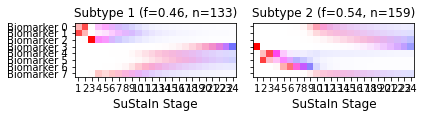

In [54]:
# Let's plot positional variance diagrams to interpret the subtype progressions

s = 1 # 1 split = 2 subtypes
M = len(zdata) 

# get the sample sequences and f
pickle_filename_s = output_folder + '/pickle_files/' + dataset_name + '_subtype' + str(s) + '.pickle'
pk = pandas.read_pickle(pickle_filename_s)
samples_sequence = pk["samples_sequence"]
samples_f = pk["samples_f"]

# use this information to plot the positional variance diagrams
tmp=pySuStaIn.ZscoreSustain._plot_sustain_model(sustain_input,samples_sequence,samples_f,M,subtype_order=(0,1))

In [ ]:
# let's take a look at all of the things that exist in SuStaIn's output (pickle) file
pk.keys()

In [ ]:
# The SuStaIn output has everything we need. We'll use it to populate our dataframe.

s = 1
pickle_filename_s = output_folder + '/pickle_files/' + dataset_name + '_subtype' + str(s) + '.pickle'
pk = pandas.read_pickle(pickle_filename_s)

for variable in ['ml_subtype', # the assigned subtype
                 'prob_ml_subtype', # the probability of the assigned subtype
                 'ml_stage', # the assigned stage 
                 'prob_ml_stage',]: # the probability of the assigned stage
    
    # add SuStaIn output to dataframe
    zdata.loc[:,variable] = pk[variable] 

# let's also add the probability for each subject of being each subtype
for i in range(s):
    zdata.loc[:,'prob_S%s'%i] = pk['prob_subtype'][:,i]
zdata.head()

In [57]:
# IMPORTANT!!! The last thing we need to do is to set all "Stage 0" subtypes to their own subtype
# We'll set current subtype (0 and 1) to 1 and 0, and we'll call "Stage 0" individuals subtype 0.

# make current subtypes (0 and 1) 1 and 2 instead
zdata.loc[:,'ml_subtype'] = zdata.ml_subtype.values + 1

# convert "Stage 0" subjects to subtype 0
zdata.loc[zdata.ml_stage==0,'ml_subtype'] = 0

In [ ]:
zdata.ml_subtype.value_counts()

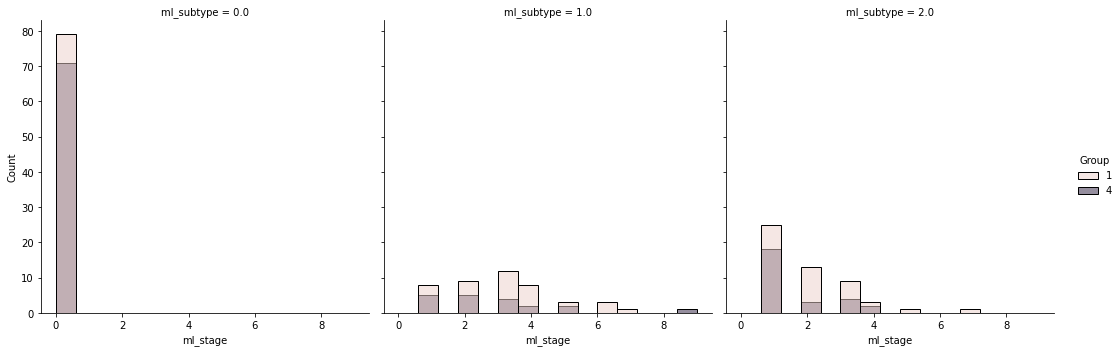

In [59]:
sns.displot(x='ml_stage',hue='Group',data=zdata,col='ml_subtype')

In [ ]:
sns.pointplot(x='ml_stage',y='prob_ml_subtype', # input variables
              hue='ml_subtype',                 # "grouping" variable
            data=zdata[zdata.ml_subtype>0]) # only plot for Subtypes 1 and 2 (not 0)
plt.ylim(0,1) 
plt.axhline(0.5,ls='--',color='k') # plot a line representing change (0.5 in the case of 2 subtypes)

In [61]:
zdata.to_excel('/Users/jana/Documents/2023-hippocampal-volume-connectivity/hippocampal_output/zdata_hippocampal_volume_connectivity.xlsx')

In [62]:
#CROSS-VALIDATION 
N_folds = 10

# generate stratified cross-validation training and test set splits
labels = zdata.Group.values
cv = sklearn.model_selection.StratifiedKFold(n_splits=N_folds, shuffle=True)
cv_it = cv.split(zdata, labels)

test_idxs = []
for train, test in cv_it:
    test_idxs.append(test)
test_idxs = np.array(test_idxs,dtype='object')

In [ ]:
# perform cross-validation and output the cross-validation information criterion and
# log-likelihood on the test set for each subtypes model and fold combination
CVIC, loglike_matrix     = sustain_input.cross_validate_sustain_model(test_idxs)

CVIC for each subtype model: [7696.05154657 7616.02079373]
Average test set log-likelihood for each subtype model: [-388.30141598 -383.75045613]


Text(0.5, 1.0, 'Test set log-likelihood across folds')

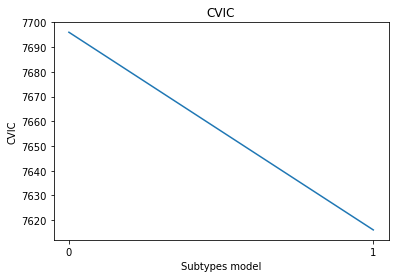

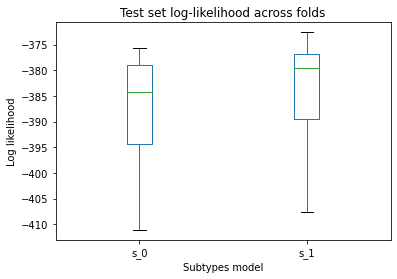

In [64]:
# go through each subtypes model and plot the log-likelihood on the test set and the CVIC
print("CVIC for each subtype model: " + str(CVIC))
print("Average test set log-likelihood for each subtype model: " + str(np.mean(loglike_matrix, 0)))

plt.figure(0)    
plt.plot(np.arange(N_S_max,dtype=int),CVIC)
plt.xticks(np.arange(N_S_max,dtype=int))
plt.ylabel('CVIC')  
plt.xlabel('Subtypes model') 
plt.title('CVIC')

plt.figure(1)
df_loglike = pandas.DataFrame(data = loglike_matrix, columns = ["s_" + str(i) for i in range(sustain_input.N_S_max)])
df_loglike.boxplot(grid=False)
plt.ylabel('Log likelihood')  
plt.xlabel('Subtypes model') 
plt.title('Test set log-likelihood across folds')

/Users/jana/opt/anaconda3/lib/python3.9/site-packages/pySuStaIn/ZscoreSustain.py:505: UserWarning: Both labels and an order have been given. The labels will be reordered according to the given order!
  warnings.warn(
/Users/jana/opt/anaconda3/lib/python3.9/site-packages/pySuStaIn/AbstractSustain.py:522: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


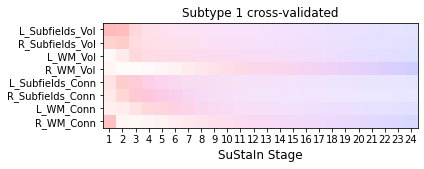

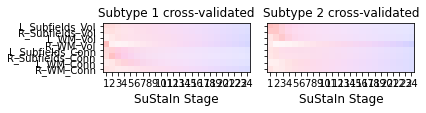

In [65]:
#this part estimates cross-validated positional variance diagrams
for i in range(N_S_max):
    sustain_input.combine_cross_validated_sequences(i+1, N_folds)

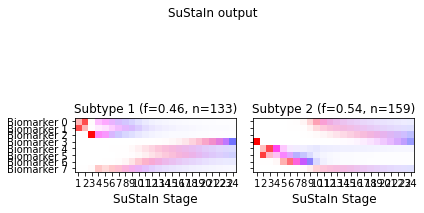

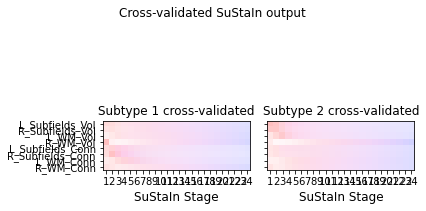

In [66]:
N_S_selected = 2

pySuStaIn.ZscoreSustain._plot_sustain_model(sustain_input,samples_sequence,samples_f,M,subtype_order=(0,1))
_ = plt.suptitle('SuStaIn output')

sustain_input.combine_cross_validated_sequences(N_S_selected, N_folds)
_ = plt.suptitle('Cross-validated SuStaIn output')